# Question 1 of Assignment 1

## 1. Setting things up

### 1.1. Creating the optimal algorithm:

In [1]:
def reuse_computation(A):
    """ find (i, j) maximizing A[i] + ... + A[j] """

    curr_val = 0
    curr_ans = (None, None)
    n=len(A)

    # compute B[i] = A[0] + .. + A[i-1] 
    B = [None] * (n+1)
    B[0] = 0
    for i in range(0, n):
        B[i+1] = B[i] + A[i]

    #compute C[i]=maxB[j] fori<j≤n 
    C = [None] * (n + 1)
    C[n] = (B[n], n)
    for i in range(n-1, -1, -1):
        if B[i] > C[i+1][0]:
            C[i] = (B[i], i)
        else:
            C[i] = C[i+1]

    for i in range(0, n):
        aux = C[i][0] - B[i]
        if aux > curr_val:
            curr_val, curr_ans = aux, (i, C[i][1])

    return curr_val

### 1.2. Function to take n random values

In [2]:
import random
import matplotlib.pyplot as plt
from math import sqrt, log

def random_instance(n):
    """ creates random instance of size n """
    a= [-1,0,1]
    b=[]
    for i in range(n):
        b.append(random.choice(a))

    return b

## 2. Running doubling experiments

### 2.1. First, getting n values for A

In [3]:
#sizes = [ i for i in range(1, 100000, 1000)]
sizes = [ (i**2) for i in range(2,316,10)]
print(sizes)

[4, 144, 484, 1024, 1764, 2704, 3844, 5184, 6724, 8464, 10404, 12544, 14884, 17424, 20164, 23104, 26244, 29584, 33124, 36864, 40804, 44944, 49284, 53824, 58564, 63504, 68644, 73984, 79524, 85264, 91204, 97344]


### 2.2. Running each experiment 20 times, before taking average for each size

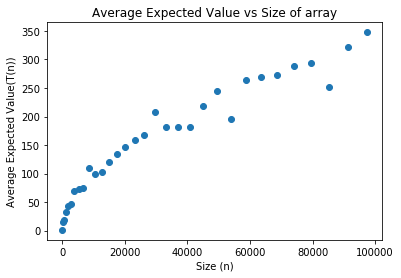

In [4]:
t=0
full=[]
while t<20:
    empty=[]
    instances = [ random_instance(n) for n in sizes ]
    for i in instances:
        max_value =reuse_computation(i)
        length=len(i)
        full.append([length, max_value])
    t+=1

    
average=[]
for i in sizes:
    whole=[]
    for array in full:
        if array[0] == i:
            whole.append(array[1])
    mean= sum(whole)/len(whole)
    average.append([i,mean])
    
plt.plot([x[0] for x in average],[x[1] for x in average], 'o')
plt.title("Average Expected Value vs Size of array")
plt.xlabel("Size (n)")
plt.ylabel("Average Expected Value(T(n))")
plt.show()

From the graph, we can see that the average T(n) curves upwards as the size of the array, A, increases. This would mean T(n) is most likely $\sqrt{n}$ or log n (taking base 2). So, taking a look at both cases:

## 3. Finding F(n) for T(n)= Θ(F(n))

If T(n)= Θ(F(n)), then, by definition, lim<sub>n→$\infty$</sub>$\frac{T(n)}{F(n)}$= some constant ,C. In that case, we'll divide T(n) by $\sqrt{n}$ and log n, for every size n, and judge which is more likely to tend to a constant, based on each plot. 

### 3.1 If F(n)= $\sqrt{n}$:

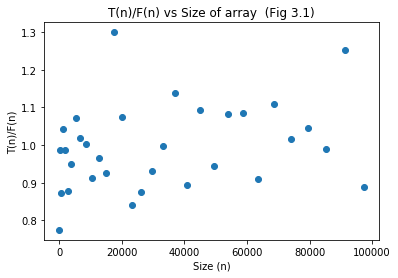

In [5]:
t=0
full=[]
while t<20:
    empty=[]
    instances = [ random_instance(n) for n in sizes ]
    for i in instances:
        max_value =reuse_computation(i)
        length=len(i)
        full.append([length, max_value/sqrt(length)])
    t+=1
    
average=[]
for i in sizes:
    whole=[]
    for array in full:
        if array[0] == i:
            whole.append(array[1])
    mean= sum(whole)/len(whole)
    average.append([i,mean])
    
plt.plot([x[0] for x in average],[x[1] for x in average], 'o')
plt.title("T(n)/F(n) vs Size of array  (Fig 3.1)")
plt.xlabel("Size (n)")
plt.ylabel("T(n)/F(n)")
plt.show()

Due to the probabilistic nature of our draws for every size, while a straight line isn't possible to join all the points, almost all of them vary between a ratio of 0.8 and 1.2 despite differences in size, which makes it likely that it is tending to a constant.

### 3.2. If F(n)= log n:

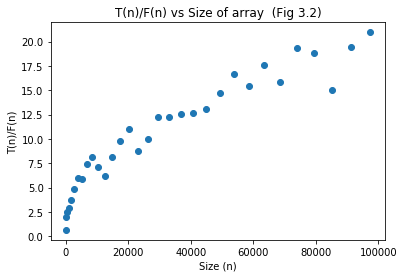

In [6]:
t=0
full=[]
while t<20:
    empty=[]
    instances = [ random_instance(n) for n in sizes ]
    for i in instances:
        max_value =reuse_computation(i)
        length=len(i)
        full.append([length, max_value/log(length,2)])
    t+=1
    
average=[]
for i in sizes:
    whole=[]
    for array in full:
        if array[0] == i:
            whole.append(array[1])
    mean= sum(whole)/len(whole)
    average.append([i,mean])
    
plt.plot([x[0] for x in average],[x[1] for x in average], 'o')
plt.title("T(n)/F(n) vs Size of array  (Fig 3.2)")
plt.xlabel("Size (n)")
plt.ylabel("T(n)/F(n)")
plt.show()

Here, we can see that the points are curving upwards, indicating that it is indeed influenced by the size and hence, its ratio is some function of n, not a constant. 

## 4. Conclusion

From our plot of T(n) vs n, we were able to identify 2 functions for F(n) based on T(n)'s shape: $\sqrt{n}$ and log n (base 2).
From figure 3.1, the ratio of T(n) to $\sqrt{n}$ varied constantly despite the size of A, indicating it is not a function of n, but is instead a constant. However, since the ratio did vary with size for our other option- log n in figure 3.2, we can safely conclude that F(n) is most likely $\sqrt{n}$